In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

# Ligne Influence Moment flechissant en  B
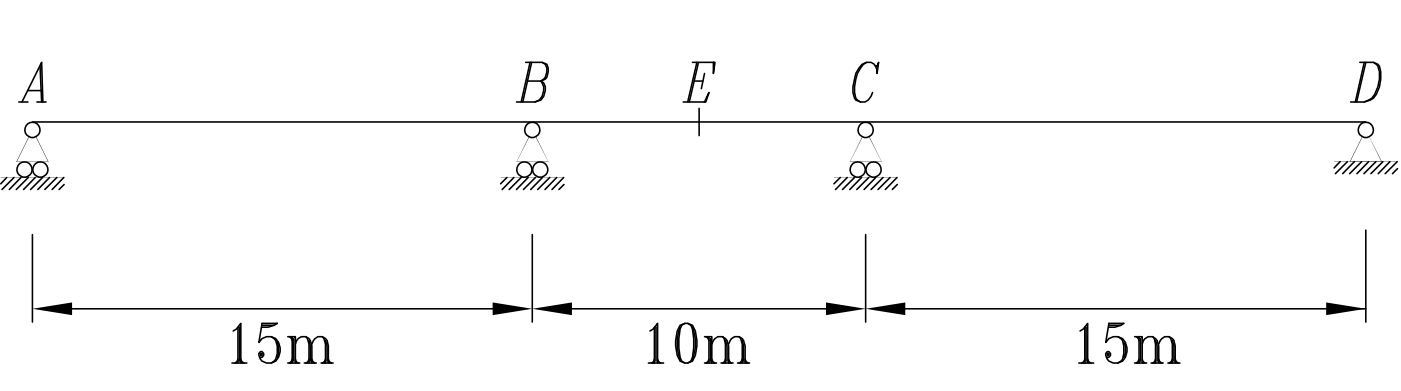

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [15, 0], # Appui B (Dupliqué pour rotation)
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

print(XY.shape)

(42, 2)


In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1


In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1


In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] = [0, 0, 38, 0, 2, 39]
LM[:,1] = [0, 1, 39, 0, 3, 40]    
LM[:,2] = [0, 2, 40, 0, 4, 41]   
LM[:,3] = [0, 3, 41, 0, 5, 42]
LM[:,4] = [0, 4, 42, 0, 6, 43]   
LM[:,5] = [0, 5, 43, 0, 7, 44]
LM[:,6] = [0, 6, 44, 0, 8, 45]
LM[:,7] = [0, 7, 45, 0, 9, 46]
LM[:,8] = [0, 8, 46, 0, 10, 47]
LM[:,9] = [0, 9, 47, 0, 11, 48]
LM[:,10] = [0, 10, 48, 0, 12, 49]
LM[:,11] = [0, 11, 49, 0, 13, 50]
LM[:,12] = [0, 12, 50, 0, 14, 51]
LM[:,13] = [0, 13, 51, 0, 15, 52]
LM[:,14] = [0, 14, 52, 0, 0, 53]

#Travée 2
LM[:,15] = [0, 0, 54, 0, 15, 55]
LM[:,16] = [0, 15, 55, 0, 16, 56]
LM[:,17] = [0, 16, 56, 0, 17, 57]
LM[:,18] = [0, 17, 57, 0, 18, 58]
LM[:,19] = [0, 18, 58, 0, 19, 59]
LM[:,20] = [0, 19, 59, 0, 20, 60]
LM[:,21] = [0, 20, 60, 0, 21, 61]
LM[:,22] = [0, 21, 61, 0, 22, 62]
LM[:,23] = [0, 22, 62, 0, 23, 64]
LM[:,24] = [0, 23, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 24, 65]
LM[:,26] = [0, 24,65, 0, 25, 66]
LM[:,27] = [0, 25,66, 0, 26, 67]
LM[:,28] = [0, 26,67, 0, 27, 68]
LM[:,29] = [0, 27,68, 0, 28, 69]
LM[:,30] = [0, 28,69, 0, 29, 70]
LM[:,31] = [0, 29,70, 0, 30, 71]
LM[:,32] = [0, 30,71, 0, 31, 72]
LM[:,33] = [0, 31,72, 0, 32, 73]
LM[:,34] = [0, 32,73, 0, 33, 74]
LM[:,35] = [0, 33,74, 0, 34, 75]
LM[:,36] = [0, 34,75, 0, 35, 76]
LM[:,37] = [0, 35,76, 0, 36, 77]
LM[:,39] = [0, 36,77, 0, 37, 78]
LM[:,40] = [0, 37,78, 0, 0, 79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22
  23  0 24 25 26 27 28 29 30 31 32 33 34 35  0 36 37]
 [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 55 56 57 58 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76  0 77 78]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15  0 15 16 17 18 19 20 21 22 23
   0 24 25 26 27 28 29 30 31 32 33 34 35 36  0 37  0]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57 58 59 60 61 62 64
  64 65 66 67 68 69 70 71 72 73 74 75 76 77  0 78 79]]


In [8]:
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(41):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[4.5431056 , 0.875     , 4.8556056 , ..., 0.50941706, 0.5309417 ,
        0.5381166 ],
       [0.875     , 4.2291665 , 4.375     , ..., 0.        , 0.        ,
        0.        ],
       [4.8556056 , 4.375     , 8.605605  , ..., 0.50941706, 0.5309417 ,
        0.5381166 ],
       ...,
       [0.50941706, 0.        , 0.50941706, ..., 2.513154  , 2.3813155 ,
        2.3373692 ],
       [0.5309417 , 0.        , 0.5309417 , ..., 2.3813155 , 3.2481315 ,
        3.203737  ],
       [0.5381166 , 0.        , 0.5381166 , ..., 2.3373692 , 3.203737  ,
        4.159193  ]], dtype=float32)

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[52] = 1
P_global[53] = -1
print(P_global)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U)

[-1.4811846  -2.625      -4.00201794 -5.         -6.14785127 -6.875
 -7.6686846  -8.         -8.31451794 -8.125      -7.83535127 -7.
 -5.9811846  -4.375      -2.50201794 -4.12578475 -4.99304933 -5.22556054
 -4.94506726 -4.27331839 -3.33206278 -2.24304933 -1.12802691  0.98111609
  1.75924265  2.34887892  2.76452417  3.02067763  3.13183857  3.11250623
  2.97717987  2.74035874  2.4165421   2.0202292   1.56591928  1.06811161
  0.54130543 -2.64583333 -2.58333333 -2.45833333 -2.27083333 -2.02083333
 -1.70833333 -1.33333333 -0.89583333 -0.39583333  0.16666667  0.79166667
  1.47916667  2.22916667  3.04166667  3.91666667  4.85416667 -2.98172646
 -2.0426009  -1.22522422 -0.52959641  0.04428251  0.49641256  0.82679372
  1.03542601  1.12230942  1.14831839  1.08744395  0.87720478  0.68146487
  0.50022422  0.33348281  0.18124066  0.04349776 -0.07974589 -0.18849028
 -0.28273543 -0.36248132 -0.42772795 -0.47847534 -0.51472347 -0.53647235
 -0.54372197]


In [11]:
# Line d'Influence Muller-Breslaut
M1 = U[52]
M2 = U[53]
LI  = U/(abs(M1) + abs(M2)) #changer le signe de M2 et M2 pour une somme en valeur absolue
print(LI)
print(LI.shape)

[-0.18902563 -0.33499691 -0.51072901 -0.63808936 -0.78457569 -0.87737286
 -0.9786612  -1.02094297 -1.06108108 -1.0368952  -0.99993085 -0.8933251
 -0.76330605 -0.55832819 -0.3193022  -0.52652387 -0.63720233 -0.66687491
 -0.63107896 -0.5453518  -0.42523076 -0.28625318 -0.14395639  0.12520795
  0.2245108   0.29975893  0.35280269  0.38549245  0.39967857  0.39721142
  0.37994136  0.34971875  0.30839396  0.25781735  0.19983929  0.13631013
  0.06908025 -0.33765562 -0.3296795  -0.31372727 -0.28979892 -0.25789445
 -0.21801386 -0.17015716 -0.11432434 -0.05051541  0.02126965  0.10103081
  0.1887681   0.2844815   0.38817103  0.49983666  0.61947842 -0.38052158
 -0.26067238 -0.15636051 -0.06758597  0.00565124  0.06335111  0.10551365
  0.13213886  0.14322674  0.14654595  0.13877728  0.11194701  0.0869671
  0.06383755  0.04255837  0.02312955  0.00555109 -0.010177   -0.02405473
 -0.03608209 -0.04625909 -0.05458573 -0.061062   -0.06568791 -0.06846346
 -0.06938864]
(79,)


(42,)
25
Ordonnée de la Ligne d'Influence : 
 [ 0.         -0.18902563 -0.33499691 -0.51072901 -0.63808936 -0.78457569
 -0.87737286 -0.9786612  -1.02094297 -1.06108108 -1.0368952  -0.99993085
 -0.8933251  -0.76330605 -0.55832819  0.          0.         -0.3193022
 -0.52652387 -0.63720233 -0.66687491 -0.63107896 -0.5453518  -0.42523076
 -0.28625318 -0.14395639  0.          0.12520795  0.2245108   0.29975893
  0.35280269  0.38549245  0.39967857  0.39721142  0.37994136  0.34971875
  0.30839396  0.25781735  0.19983929  0.13631013  0.06908025  0.        ]


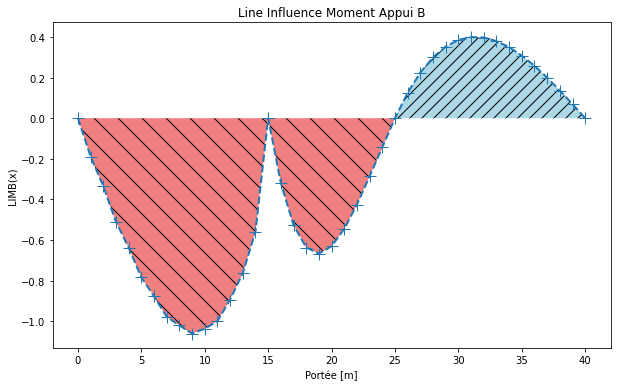

In [13]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]

print(x.shape)

y = np.zeros((42,))
# appui A
y[0] = 0
# Noeud 1 à 14
y[1:15] = LI[0:14]
y[15] = 0
y[16] = 0
# Noeud 4 : Point 15 à 23
y[17:26] = LI[14:23]
print(x[26])
# Appui C
y[26] = 0
# # Noeud 5, 6
y[27:41] = LI[23:37]
# # Noeud 7 reaction appui 0
y[41] = 0
print("Ordonnée de la Ligne d'Influence : \n",y)

plt.figure(figsize=(10,6))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée [m]")
plt.ylabel("LIMB(x)")
plt.title("Line Influence Moment Appui B")

# Show the plot
plt.show()

np.savetxt('./resultats/LIMB_resultats.csv', y, delimiter=',', fmt='%s')
